In [45]:
# Import dependencies
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# This dictionary was created from the list on ftw.usatoday.com/2022/12/the-game-awards-2022-winners
# and gives us all of the candidates' pages that need scraping as well as the consoles they use
dict_of_candidates = {'a-plague-tale-requiem': 'playstation-5',
                      'elden-ring': 'playstation-5',
                      'god-of-war-ragnarok': 'playstation-5', 
                      'horizon-forbidden-west': 'playstation-5', 
                      'stray': 'playstation-5', 
                      'xenoblade-chronicles-3': 'switch'}

In [6]:
# Create lists that will hold the data for the DataFrame
game_title = []
console_used = []
username = []
user_score = []
user_review_date = []
user_comments = []
total_helpful_thumbs = []
total_thumbs = []


# This is to mimic headers that the server is expecting and prevent redirects
headers = {
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'en-US,en;q=0.8',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
}

#This begins the loop that will scrape the first page
for candidate, console in dict_of_candidates.items():
    base_url = 'https://www.metacritic.com/game/'+str(console)+'/'+str(candidate)+'/user-reviews?page=0'
    print(base_url)
    first_page = re.get(base_url, headers=headers)
    metacritic_soup = bs(first_page.text, 'html.parser')
    
    # This returns the total number of pages that will need to be scraped
    total_page_text = metacritic_soup.find('li', class_='page last_page')
    total_page_number = total_page_text.find('a', class_='page_num').text
    total_pages = int(total_page_number)
    
    #This gets the name of the game that will be attached to each new row of data
    game_name_body = metacritic_soup.find('div', class_='product_title')
    game_name = game_name_body.find('h1').text
    print(f'{game_name} scraping initiated...')
    
    #This is the overall score, I have it here in case it is needed for future purposes
    metacritic_score = metacritic_soup.find('div', class_='metascore_w user large game positive').text
    
    #This begins to scrape each page within the dictionary above based on how many pages were found within each
    #games webpage
    for page in range(0, total_pages+1):
        mutable_url = 'https://www.metacritic.com/game/'+str(console)+'/'+str(candidate)+'/user-reviews?page='+str(page) 
        response = re.get(mutable_url, headers=headers)
        metacritic_soup = bs(response.text, 'html.parser')

        review_body = metacritic_soup.find_all('ol', class_='reviews user_reviews')

        for review in review_body:
            individual_review = review.find_all('li')
            
            for user_review in individual_review:
                
                user_profile_name = user_review.find_all('div', class_='name')
                for profile_name in user_profile_name:
                    username.append(profile_name.text)
                
                user_rating = user_review.find_all('div', class_='review_grade')
                for rating in user_rating:
                    game_title.append(game_name)
                    user_score.append(rating.text)
                    console_used.append(console)
                
                user_date = user_review.find_all('div', class_='date')
                for user in user_date:
                    user_review_date.append(user.text)
                
                user_review_body = review.find_all('div', class_='review_body')
                for body in user_review_body:
                    user_comments.append(body.text)
                
                rating_thumbs = review.find_all('span', class_='total_ups')
                for helpful_thumbs in rating_thumbs:
                    total_helpful_thumbs.append(helpful_thumbs.text)
                    
                total_rated_thumbs = review.find_all('span', class_='total_thumbs')
                for thumbs in total_rated_thumbs:
                    total_thumbs.append(thumbs.text)
            
        print(f'Page {page} completed')
                
print('Scraping Complete!')

https://www.metacritic.com/game/playstation-5/a-plague-tale-requiem/user-reviews?page=0
A Plague Tale: Requiem scraping initiated...
Page 0 completed
Page 1 completed
Page 2 completed
https://www.metacritic.com/game/playstation-5/elden-ring/user-reviews?page=0
Elden Ring scraping initiated...
Page 0 completed
Page 1 completed
Page 2 completed
Page 3 completed
Page 4 completed
Page 5 completed
Page 6 completed
Page 7 completed
Page 8 completed
Page 9 completed
Page 10 completed
Page 11 completed
Page 12 completed
Page 13 completed
Page 14 completed
Page 15 completed
Page 16 completed
Page 17 completed
Page 18 completed
Page 19 completed
Page 20 completed
Page 21 completed
Page 22 completed
Page 23 completed
Page 24 completed
Page 25 completed
Page 26 completed
Page 27 completed
Page 28 completed
Page 29 completed
Page 30 completed
Page 31 completed
Page 32 completed
Page 33 completed
Page 34 completed
Page 35 completed
Page 36 completed
Page 37 completed
Page 38 completed
Page 39 comple

In [173]:
game_data = list(zip(game_title, console_used, username, user_score, user_review_date, user_comments, total_helpful_thumbs, total_thumbs))
game_df = pd.DataFrame(game_data, columns=['game', 'console', 'username', 'user_score', 'review_date', 'comments', "thumbs_up", "total_thumb_rating"])
game_df = game_df.replace('\n', '', regex=True)
game_df['console'] = game_df['console'].replace('-', ' ', regex=True)
game_df['console'] = game_df['console'].str.title()
game_df.index += 1
game_df

,game,console,username,user_score,review_date,comments,thumbs_up,total_thumb_rating
1,A Plague Tale: Requiem,Playstation 5,Morbo,10,"Oct 25, 2022",Beautiful game. Played on a PS5 with little is...,4,4
2,A Plague Tale: Requiem,Playstation 5,GamergodsFail,9,"Oct 27, 2022",Requiem is an even more ambitious game than it...,3,3
3,A Plague Tale: Requiem,Playstation 5,InTheSpotlight,10,"Oct 28, 2022",As someone who was quite dissapointed with A P...,3,3
4,A Plague Tale: Requiem,Playstation 5,george_bondo,9,"Oct 27, 2022","this is a bold, made with soul, one of the mos...",3,3
5,A Plague Tale: Requiem,Playstation 5,OneFadedGunner,10,"Nov 5, 2022","A great story, fun gameplay. One of the best g...",2,2
...,...,...,...,...,...,...,...,...
14646,Xenoblade Chronicles 3,Switch,Garchomp102,1,"Dec 24, 2022",Don't listen to the haters. Sure there are som...,3,6
14647,Xenoblade Chronicles 3,Switch,DominotheDomino,10,"Dec 26, 2022","Un jeu incroyable, avec une narration folle, d...",3,6
14648,Xenoblade Chronicles 3,Switch,Jc3902,10,"Jan 7, 2023",Gráficos incríveis mecânicas de jogo interessa...,3,6
14649,Xenoblade Chronicles 3,Switch,Pelamakoto,9,"Jan 8, 2023","One of the most unique games out there, Thanks...",2,4


In [174]:
game_df['game'] = game_df['game'].astype(str)
game_df['console'] = game_df['console'].astype(str)
game_df['username'] = game_df['username'].astype(str)
game_df['user_score'] = game_df['user_score'].astype(int)
game_df['review_date'] = pd.to_datetime(game_df['review_date'], infer_datetime_format=True)
game_df['comments'] = game_df['comments'].astype(str)
game_df['thumbs_up'] = game_df['thumbs_up'].astype(int)
game_df['total_thumb_rating'] = game_df['total_thumb_rating'].astype(int)

In [175]:
game_df.to_csv('2022_GOTY.csv', header=True)

In [176]:
average_rating = game_df.groupby(by='game').mean()
average_rating

,user_score,thumbs_up,total_thumb_rating
game,,,
A Plague Tale: Requiem,7.473988,3.173410,6.277457
Elden Ring,7.616277,2.890454,6.123628
God of War: Ragnarok,8.309607,2.895138,6.112185
Horizon Forbidden West,8.243907,2.905158,6.128148
Stray,8.456164,2.957534,6.276712
Xenoblade Chronicles 3,8.837931,2.850000,5.982759


In [177]:
average_rating['overall'] = round(game_df['user_score'].mean(), 2)
average_rating['overall']

game
A Plague Tale: Requiem    8.08
Elden Ring                8.08
God of War: Ragnarok      8.08
Horizon Forbidden West    8.08
Stray                     8.08
Xenoblade Chronicles 3    8.08
Name: overall, dtype: float64

In [178]:
average_rating

,user_score,thumbs_up,total_thumb_rating,overall
game,,,,
A Plague Tale: Requiem,7.473988,3.173410,6.277457,8.08
Elden Ring,7.616277,2.890454,6.123628,8.08
God of War: Ragnarok,8.309607,2.895138,6.112185,8.08
Horizon Forbidden West,8.243907,2.905158,6.128148,8.08
Stray,8.456164,2.957534,6.276712,8.08
Xenoblade Chronicles 3,8.837931,2.850000,5.982759,8.08


In [198]:
average_rating['delta_rating'] = average_rating['user_score'] - average_rating['overall']
average_rating

,user_score,thumbs_up,total_thumb_rating,overall,delta_rating
game,,,,,
A Plague Tale: Requiem,7.473988,3.173410,6.277457,8.08,-0.606012
Elden Ring,7.616277,2.890454,6.123628,8.08,-0.463723
God of War: Ragnarok,8.309607,2.895138,6.112185,8.08,0.229607
Horizon Forbidden West,8.243907,2.905158,6.128148,8.08,0.163907
Stray,8.456164,2.957534,6.276712,8.08,0.376164
Xenoblade Chronicles 3,8.837931,2.850000,5.982759,8.08,0.757931


ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

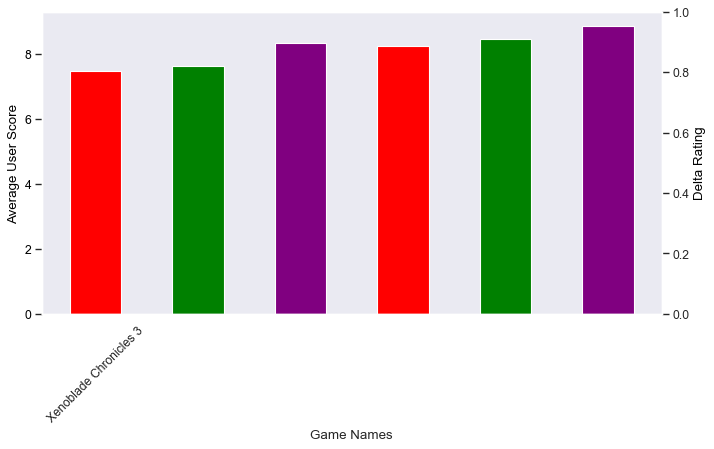

In [200]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# Define Data

x = average_rating.index
data_1 = average_rating['user_score']
data_2 = average_rating['delta_rating']
  
# Create Plot

fig, ax1 = plt.subplots(figsize=(10,5), dpi=80) 

ax1.grid(False)

colors = ['red', 'green', 'purple']
ax1.set_xlabel('Game Names') 
ax1.set_ylabel('Average User Score', color = 'black') 
ax1.bar(x, data_1, color = colors, width=.5)
ax1.tick_params(axis ='x', rotation=45) 
ax1.tick_params(axis ='y', labelcolor = 'black') 
  
# Adding Twin Axes
ax2 = ax1.twinx()

ax2.grid(False)
  
ax2.set_ylabel('Delta Rating', color = 'black') 
ax2.plot(x, data_2, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'black') 

for ab in zip(x, data_2):
    ax.annotate('(%s, %s)' % xy, ab=ab, textcoords='data')
    
# Show plot

plt.show()